In [92]:
import pandas as pd
fish = pd.read_csv('http://bit.ly/fish_csv')
fish.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961
3,Bream,363.0,29.0,33.5,12.7300,4.4555
4,Bream,430.0,29.0,34.0,12.4440,5.1340


## k-neighbor로 확률 구하기.

In [93]:
#Species의 unique값 추출하기.
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


In [94]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled,train_target)
print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.825


In [95]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5]) #predict_proba() : 클래스별 확률값을 반환한다.
print(np.round(proba, decimals=4))         #round() : 소수점 반올림 할때 사용한다. decimals 매개변수로 소수점아래 자릿수를 지정한다.

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.3333 0.6667 0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.     0.     0.3333]]


# 로지스틱회귀
### 시그모이드함수(Sigmoid function)

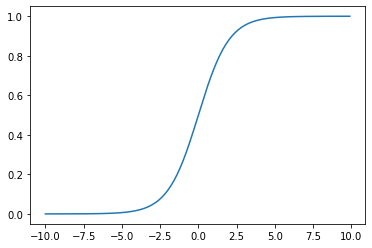

In [91]:
#시그모이드함수 그리기.
import numpy as np
import matplotlib.pyplot as plt
z = np.arange(-10, 10, 0.1)
x = 1 / (1 + np.exp(-z))

plt.plot(z, x)
plt.show()

### 로지스틱회귀 모델 사용

**이진분류 수행**

In [29]:
#도미와 빙어 데이터만 사용하기.
#char_arr = np.array(['A', 'B', 'C', 'D', 'E'])
#print(char_arr[[True, False, True, False, False]])   ##불리언 인덱싱 사용하기
bs_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bs = train_scaled[bs_indexes]
target_bs = train_target[bs_indexes]

In [31]:
from sklearn.linear_model import LogisticRegression #로지스틱 회귀 모델
lr = LogisticRegression()
lr.fit(train_bs, target_bs)

LogisticRegression()

In [33]:
print(lr.predict(train_bs[:5]))

['Bream' 'Bream' 'Bream' 'Bream' 'Bream']


In [48]:
print(lr.predict_proba(train_bs[:5])) #predict_proba 메서드를 사용해 확률 보기. 양성클래스와 음성클래스의 확률을 반환.

[[0.99784284 0.00215716]
 [0.95185639 0.04814361]
 [0.9862987  0.0137013 ]
 [0.99417753 0.00582247]
 [0.96398519 0.03601481]]


In [37]:
print(lr.classes_) #어느것이 음성클래스인지 양성클래스인지 확인하기. 첫번째가 음성 두번째가 양성클래스

['Bream' 'Smelt']


In [46]:
print(lr.coef_, lr.intercept_) #로지스틱회귀의 선형방정식 계수확인하기.
print("")
print(lr.decision_function(train_bs[:5])) #선형방정식 값 확인하기. 양성클래스에 대한 값을 반환한다.

[[-0.43336757 -0.62142102 -0.70604772 -0.98380679 -0.76327199]] [-2.18852429]

[-6.13680177 -2.9842257  -4.27646821 -5.14019182 -3.2871458 ]


In [47]:
#선형방정식 값을 시그모이드 함수에 대입하기.
from scipy.special import expit
print(expit(lr.decision_function(train_bs[:5]))) 

[0.00215716 0.04814361 0.0137013  0.00582247 0.03601481]


   
**다중분류 수행**

In [59]:
lr = LogisticRegression(C=40, max_iter=1000) #C는 규제를 제어하는 매개변수로, C가 작을수록 규제가 커진다. 
                                            #max_iter는 반복횟수를 지정하며 기본값은 100이다.

In [60]:
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9495798319327731
0.95


In [62]:
#처음 5개샘플 예측.
print(lr.predict(test_scaled[:5]))

['Roach' 'Perch' 'Pike' 'Bream' 'Perch']


In [66]:
#5개 샘플 확률 출력.
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals=3)) #소수점3번째자리까지 출력.

[[0.    0.013 0.286 0.001 0.67  0.014 0.018]
 [0.011 0.    0.647 0.    0.    0.    0.342]
 [0.    0.    0.007 0.993 0.    0.    0.   ]
 [0.982 0.012 0.    0.    0.    0.    0.006]
 [0.    0.    0.934 0.    0.    0.    0.066]]


In [96]:
print(lr.classes_) #클래스 확인하기.

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [97]:
#선형방정식 계수 확인하기.
print(lr.coef_.shape, lr.intercept_.shape)
#클래스마다 Z값을 한개씩 계산해야 하므로 7개의 행이나오고, 특성이 5개 이므로 5개의 배열이 나온다. 

(7, 5) (7,)


In [98]:
#각 샘플 클래스의 z값 계수 구하기
decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.6    0.39   3.49  -2.78   4.35   0.45   0.7 ]
 [  5.58  -2.86   9.7    1.31  -0.42 -22.39   9.07]
 [ -0.7  -16.35  11.    15.97  -5.77  -7.71   3.56]
 [ 11.2    6.78  -5.83  -3.07   2.03 -17.22   6.11]
 [  1.94  -3.89  10.16   1.27   0.61 -17.59   7.5 ]]


In [81]:
#z값으로 softmax함수 적용하기.
from scipy.special import softmax
proba  = softmax(decision, axis=1)   #axis 매개변수는 softmax를 계산할 축을 지정한다. 
                                    #axis를 1로 지정하면 각 행마다 softmax를 계산하고, 지정하지 않으면 배열전체에대한 softmax를 계산한다.
print(np.round(proba, decimals=3))

[[0.    0.013 0.286 0.001 0.67  0.014 0.018]
 [0.011 0.    0.647 0.    0.    0.    0.342]
 [0.    0.    0.007 0.993 0.    0.    0.   ]
 [0.982 0.012 0.    0.    0.    0.    0.006]
 [0.    0.    0.934 0.    0.    0.    0.066]]
